In [ ]:
# are gardens all in a specific type of neighborhoods? e.g. rich/gentrified areas?

# side idea: use random forest/logistic regression for predicting
# whether a specific NTA would have a garden (note: not including crime)

In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import make_classification
from sklearn.datasets import make_blobs
from matplotlib.pylab import plt
%matplotlib inline
from sklearn.linear_model import LogisticRegression
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

In [8]:
data = pd.read_csv('data/ACS Data_NYC_NTA.csv') # 2015
data.head()

,borocode,withssi,withsocial,withpubass,struggling,profession,popunemplo,poptot,popover18,popinlabou,...,ntaname,boroname,popdty,ntacode,medianinco,medianagem,medianagef,medianage,HHsize,gini
0,1,191,2931,261,2285,1656,1133,21864,19975,13467,...,Stuyvesant Town-Cooper Village,Manhattan,206727.51,MN50,196932.0,75.6,82.5,78.0,2.085000,0.467700
1,1,283,2652,318,1336,2062,1752,26075,24469,18684,...,Gramercy,Manhattan,387816.60,MN21,390330.0,148.4,133.4,140.5,1.647500,0.485875
2,2,935,2532,237,6319,160,1503,30376,23221,15901,...,Parkchester,Bronx,498327.97,BX46,237017.0,183.2,181.9,182.1,2.480000,0.383180
3,1,675,3184,294,5312,1717,1682,43755,41008,29267,...,East Village,Manhattan,781548.20,MN22,518245.0,247.9,220.3,234.6,1.748571,0.502271
4,3,1218,3662,189,2966,142,439,15472,14185,6833,...,West Brighton,Brooklyn,248939.42,BK23,158958.0,229.0,233.1,232.7,1.935000,0.460500


In [6]:
data.columns

Index(['borocode', 'withssi', 'withsocial', 'withpubass', 'struggling',
       'profession', 'popunemplo', 'poptot', 'popover18', 'popinlabou',
       'poororstru', 'poor', 'pacificune', 'pacificinl', 'pacific',
       'otherunemp', 'otherinlab', 'otherethni', 'onlyprofes', 'onlymaster',
       'onlylessth', 'onlyhighsc', 'onlydoctor', 'onlycolleg', 'onlybachel',
       'okay', 'mixedunemp', 'mixedinlab', 'mixed', 'master', 'maleunempl',
       'maleover18', 'male_pro', 'male_mastr', 'male_lesHS', 'male_HS',
       'male_doctr', 'male_collg', 'male_BA', 'maleinlabo', 'maledrop',
       'male16to19', 'male', 'lessthan10', 'lessthanhi', 'households',
       'hispanicun', 'hispanicin', 'hispanic', 'highschool', 'field_1',
       'femaleunem', 'femaleover', 'fem_profes', 'fem_master', 'fem_lessHS',
       'fem_HS', 'fem_doctor', 'fem_colleg', 'fem_BA', 'femaleinla',
       'femaledrop', 'femal16_19', 'female', 'europeanun', 'europeanin',
       'european', 'doctorate', 'comm90plus', 'comm_

In [11]:
data.set_index('ntaname') 

,borocode,withssi,withsocial,withpubass,struggling,profession,popunemplo,poptot,popover18,popinlabou,...,african,boroname,popdty,ntacode,medianinco,medianagem,medianagef,medianage,HHsize,gini
ntaname,,,,,,,,,,,,,,,,,,,,,
Stuyvesant Town-Cooper Village,1,191,2931,261,2285,1656,1133,21864,19975,13467,...,1076,Manhattan,206727.510000,MN50,196932.0,75.6,82.5,78.0,2.085000,0.467700
Gramercy,1,283,2652,318,1336,2062,1752,26075,24469,18684,...,827,Manhattan,387816.600000,MN21,390330.0,148.4,133.4,140.5,1.647500,0.485875
Parkchester,2,935,2532,237,6319,160,1503,30376,23221,15901,...,15025,Bronx,498327.970000,BX46,237017.0,183.2,181.9,182.1,2.480000,0.383180
East Village,1,675,3184,294,5312,1717,1682,43755,41008,29267,...,2719,Manhattan,781548.200000,MN22,518245.0,247.9,220.3,234.6,1.748571,0.502271
West Brighton,3,1218,3662,189,2966,142,439,15472,14185,6833,...,168,Brooklyn,248939.420000,BK23,158958.0,229.0,233.1,232.7,1.935000,0.460500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Pelham Bay-Country Club-City Island,2,582,4015,107,4087,567,1170,26139,21814,14105,...,680,Bronx,169827.815000,BX10,340905.0,255.6,280.1,267.5,2.353333,0.430983
park-cemetery-etc-Manhattan,1,0,0,0,143,0,151,1483,1472,265,...,838,Manhattan,1884.995755,MN99,NaN,NaN,NaN,NaN,NaN,NaN
park-cemetery-etc-Bronx,2,43,72,7,299,0,94,1377,986,694,...,438,Bronx,2062.683807,BX99,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
data.shape
                                

(195, 96)

In [14]:
data = data.replace([np.inf, -np.inf, np.nan], 0)
# 

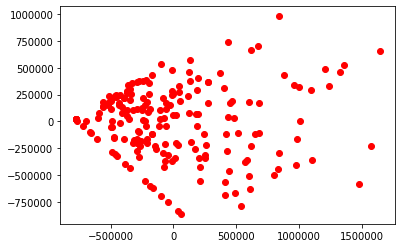

In [29]:
from sklearn.decomposition import PCA
pca = PCA(5) # TODO: try diff num of components, check percentage of explained variance? 
X_model=pca.fit_transform(data.drop(['boroname', 'ntacode','ntaname'], axis=1))
plt.scatter(X_model[:,0],X_model[:,1],c="r")
plt.show()

In [ ]:
# TODO: 
# feature selection
# correlation matrix, 
    # drop similar/highly correlated features

In [30]:
km1=KMeans(random_state=1,n_clusters=5, n_init=20)

In [ ]:
# how to verify whether the model is useful?
# idea1: maybe get correlation score of 'predicted cluster' vs 'number of gardens'

# model with n_clusters=3
# NTA1, cluster=1, num of gardens=5
# NTA2, cluster=2, num of gardens=20
# NTA3, cluster=3, num of gardens=1

# model with n_clusters=2
# NTA1, cluster=1, num of gardens=5
# NTA2, cluster=2, num of gardens=20
# NTA3, cluster=1, num of gardens=1

In [ ]:
# how to verify whether the model is useful?
# idea2: compare cluster model to RF or use cluster as a feature for RF

# model with n_clusters=3
# NTA1, cluster=1, num of gardens=5
# NTA2, cluster=2, num of gardens=20
# NTA3, cluster=3, num of gardens=1

# model with n_clusters=2
# NTA1, cluster=1, num of gardens=5
# NTA2, cluster=2, num of gardens=20
# NTA3, cluster=1, num of gardens=1

In [31]:
#train the model
model=km1.fit(data.drop(['boroname', 'ntacode','ntaname'], axis=1))

In [32]:
y_t1=model.labels_

In [33]:
print(y_t1)

[4 4 0 0 4 3 4 0 0 0 0 4 4 2 0 0 0 0 0 2 0 4 2 4 4 4 0 0 3 4 3 2 0 0 4 0 4
 0 0 4 2 4 2 0 3 0 2 3 1 0 3 0 0 3 0 4 4 4 2 3 3 0 0 3 3 2 4 4 2 1 4 0 2 2
 3 0 3 3 1 3 3 2 2 0 3 1 1 2 3 2 4 0 2 0 3 4 4 4 3 0 4 3 1 3 0 4 4 3 4 4 1
 3 4 4 3 4 1 2 4 0 4 3 2 0 1 1 2 4 2 2 2 2 3 4 3 2 4 4 4 0 1 2 3 3 4 1 4 4
 0 3 0 3 0 0 4 1 0 4 0 1 3 4 4 4 3 4 4 4 4 4 3 4 3 0 4 4 4 0 4 4 4 0 4 2 3
 3 1 3 4 4 4 4 4 4 4]


In [34]:
#Silhouette_score

X1=data.drop(['boroname', 'ntacode','ntaname'], axis=1)
range_n_clusters = [2, 3, 4, 5,6,7,8]
for n_clusters in range_n_clusters:
    km1 = KMeans(n_clusters=n_clusters, random_state=324)
    cluster_labels = km1.fit_predict(X1)
    silhouette_avg = silhouette_score(X1, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)
    sample_silhouette_values = silhouette_samples(X1, cluster_labels)

For n_clusters = 2 The average silhouette_score is : 0.4793580779245535
For n_clusters = 3 The average silhouette_score is : 0.4114850329155607
For n_clusters = 4 The average silhouette_score is : 0.3754984910181671
For n_clusters = 5 The average silhouette_score is : 0.3934470212351089
For n_clusters = 6 The average silhouette_score is : 0.3829599317445118
For n_clusters = 7 The average silhouette_score is : 0.35296725292767844
For n_clusters = 8 The average silhouette_score is : 0.33777449397206344


In [ ]:
# TODO: